# Previous Lesson Review: Day 8 Pandas_Intro

In the previous lesson you learned how to:

1. Create a dataframe from scratch
2. Read in tabular data into a dataframe
3. View and access data in the dataframe
4. Save and export a dataframe

# Day 9: Pandas_Modifications
In the previous lesson we learned about dataframes, in this lesson we will learn how to modify dataframes.

# Goals:

Students will be able to :

1. Modify dataframe
2. Modify values
3. Clean data and make a function to import data
4. Merge, concat, append
5. Automation 

Here is a picture of panda not letting go of the zookeeper. Sometimes trying to get your data in the format you want feels like you are battling a panda.

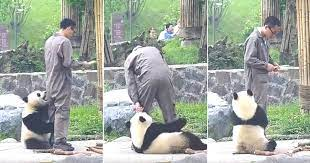

# System version when preparing this notebook
- python 3.8.11
- padas 1.1.3
- numpy 1.20.3

This lesson was prepared by Maria D Hernadez Limon for NRT Environment Science Bootcamps 2021. 

# Set-Up working Space

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#sanity check my versions
print (pd.__version__)

In [ ]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'

# 8. Modifying dataframes

First let's open or pokemon dataset. We will be working with this data for the rest of section 8.

In [ ]:
pokemon_df=pd.read_csv(datadirectory+'pokemon.csv')
pokemon_df.head()

### 8.1 Adding new columns
Same logic as when we created new dataframes in section 2.3

#### - Initialize a new column with some value

In [ ]:
#start a new series with values from 0 to the size of this table (we get this value from shape)
pokemon_df['Test']=np.arange(0,pokemon_df.shape[0])
pokemon_df

#### - Use conditions to create values for your new column

In [ ]:
#we can use where from numpy to get conditional values in our new row
pokemon_df['Boss']=np.where(pokemon_df['Attack']>150,'strong','weak')
pokemon_df

In [ ]:
#we can select data with loc and specify a new colum name and a value for the rows that meet our condition
pokemon_df.loc[pokemon_df['Type 1']=='Grass','Color']='Green'
pokemon_df

#### - Add Numeric columns

In [ ]:
pokemon_df['Strength']=pokemon_df['Attack']*pokemon_df['Speed']
pokemon_df.head()

#### - Add String columns

In [ ]:
pokemon_df['full_type']=pokemon_df['Type 1']+'_'+pokemon_df['Type 2']
pokemon_df

### 8.2 removing columns/rows
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

#### - columns

In [ ]:
#we specify axis=1 to drop columns, if we want this change in the original table we use inplace=True
pokemon_drop=pokemon_df.drop(columns=['Test','Boss','full_type'], axis=1)
pokemon_drop.head()

#### - rows

In [ ]:
#we specify axis=0 to drop rows, if we want this change in the original table we use inplace=True
pokemon_drop_row=pokemon_df.drop(labels=[0,2,4],axis=0)
pokemon_drop_row.head()

### -quick plot after droping unwanted columns

In [ ]:
pokemon_df.drop(['Number','Strength','Boss','Total','Test','Generation'],axis=1).plot(x='Type 1',kind='box',title="Pokemon_df_value_range")

### 8.3 remove duplicates

We can remove duplicates in our data by selecting a column and which values we want to drop.

DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [ ]:
pokemon_sans_duplicates=pokemon_df.drop_duplicates(subset=['Type 1'],keep='first')
# or inplace=True if you want to make the changes to your main table 
pokemon_sans_duplicates.head()

### 8.4 rename columns/index

We can rename the labels of the column and the index.

DataFrame.rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

#### - columns

In [ ]:
pokemon_df.rename(columns={'Total':'Total_Stats'},inplace=True)
pokemon_df.head()

In [ ]:
new_names={'HP':'Hit_Points','Defense':'Def.'}
pokemon_df.rename(columns=new_names,inplace=True)
pokemon_df.head()

Pass a list of equal length to pokemon_df.columns to replace all values.

In [ ]:
pokemon_df.columns=[np.arange(len(pokemon_df.columns))]
pokemon_df

In [ ]:
import string
alphabet=list(string.ascii_uppercase)

pokemon_df.columns=alphabet[:len(pokemon_df.columns)]
pokemon_df

#### - rows

In [ ]:
pokemon_df.rename(index={0:1000,1:2000},inplace=True)
pokemon_df.head()

In [ ]:
new_row_names={1000:0,2000:1}
pokemon_df.rename(index=new_row_names,inplace=True)
pokemon_df.head()

## 8.5 Skills Practice
Create new column named power. I'll define Power as the sum of Attack and Speed. Then create a new table that has all the rows but only 3 coluns(Name, Type 1 and Power). Then I want you to change the Type 1 name to Type (without the 1). Sort the Pokemon by Power and only keep the top 5. Do this all with one line of code by attaching commands together.

First let's read in the dataset again since we made a lot of changes inplace.

In [ ]:
pokemon_df=pd.read_csv(datadirectory+'pokemon.csv')
pokemon_df.head()

In [ ]:
#first add new column called power to pokemon_df



#create new frame with only columns wanted
#rename the column Type 1 to Type
#sort_values (you want ascending to be True)
#keep only the top 5 




#show your table                                                                                                            ascending=False).iloc[0:5,]

# BREAK

# 9. Modify Values

### 9.1 fillna with values
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
#select the colum you want then call .fillna
pokemon_df['Type 2'].fillna(value='no type',inplace=True)
pokemon_df.head()

### 9.4 dropna values
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
#read table in again because we've done a lot of modifications
pokemon_df=pd.read_csv(datadirectory+'pokemon.csv')
pokemon_df

In [ ]:
#If you want the changes in your existing table then use inplace=True instead of initializing a new variable

drop_null_df=pokemon_df.dropna(subset=['Type 2'])
drop_null_df.head()

### 9.3 replace values
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [ ]:
pokemon_df['Type 2']=pokemon_df['Type 2'].replace('no_type', 'empty')
pokemon_df.head()

In [ ]:
pokemon_df.loc[pokemon_df['Type 2'].isnull(),'Type 2']='no_type'
pokemon_df

### 9.2 Modify Strings
I am only showing you basic examples to introduce you to the options. Here are some resources to learn more:
https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

All the string operations you learned on Day 2 on how to modify strings can be used on columns of dataframes.


In [ ]:
#select all mega pokemon
pokemon_df['clean_Mega']=[i.replace('Mega',' M*') for i in pokemon_df['Name']]
pokemon_df

In [ ]:
pokemon_df['Name']=[i.upper() for i in pokemon_df['Name']]
pokemon_df

In [ ]:
pokemon_df_2=pokemon_df.add_prefix('{}_'.format("x"))
pokemon_df_2

In [ ]:
pokemon_df_3=pokemon_df_2.add_suffix('{}_'.format("y"))
pokemon_df_3

# Break

# 10. Example of cleaning data and making a function

In this section we are going to clean up the Great Lakes Ice data we imported in the last lesson. I'll show you a workflow on how to get started building functions to help read in multiple files with the same formatting. Keep in mind this is a simple example to get you started and your data will require you to learn how to process your own files.

In [ ]:
## import the data
ice=pd.read_table(datadirectory+'gl_2019_2020_ice.csv')
ice

This table doesn't look good, I'll have to skip 5 rows when reading to actually get to my data. But for now let's grab the second row(python counting) since this row has the column names we will need. I'll do some string manipulation to ge the names in a useful format.

In [ ]:
ice_names=ice.iloc[2,].str.split(" +", n = 8, expand = True)
ice_names

Now that I have a nice table I'll use the column names and the first row values to make a dictionary of names for my columns.

In [ ]:
ice_names_dict=dict(zip(ice_names.keys(),ice_names.iloc[0,]))
ice_names_dict

Let's go back to the data and import again but skip the first 5 rows that don't have data, tell pandas we don't have a header since the formatting is bad. I also need to find the right delimiter since _csv didn't work.

In [ ]:
ice_clean=pd.read_csv(datadirectory+'gl_2018_2019_ice.csv',skiprows=5,header=None,delimiter='\t')
ice_clean

That didn't work.

In [ ]:
ice_clean=pd.read_csv(datadirectory+'gl_2018_2019_ice.csv',skiprows=5,header=None,delimiter=' ')
ice_clean

Ok so there are multiple spaces as sepeartors (3 of them per column) so I will use a special paramter called delim_whitespace and hope it works.

In [ ]:
ice_clean=pd.read_csv(datadirectory+'gl_2018_2019_ice.csv',skiprows=5,header=None,delim_whitespace=True)
ice_clean

Let's change the column names with the dictionary we made.

In [ ]:
ice_clean.rename(columns=ice_names_dict,inplace=True)
ice_clean

I don't like the long names, let's change them to initials.

In [ ]:
lake_initials={'Sup.':'SU','Mich.':'MI','Huron':'HU','Erie':'ER','Ont.':'ON'}

ice_clean.rename(columns=lake_initials,inplace=True)
ice_clean

Let's drop the info for St. Claire lake and the total.

In [ ]:
ice_clean.drop(['St.Clr','GL Total'],axis=1,inplace=True)
ice_clean

At this point I am getting curious about which lake freezes first and the most. So I am going to make a quick line plot.

In [ ]:
ice_clean.plot(y=ice_clean.keys()[2:],kind='line',ylabel='ice_con%',xlabel='winter 2018-2019')

# Automation - Functions

Now, we did all of this for one file but the reality is that I need multiple years of this data. Let's make a function so I don't have to repeat these steps everytime I want the ice data. The following function will work with any year but I've only given you data from 2015-2019 so if you run other years it will not work.

In [ ]:
def get_ice_data(year):
    #read in data but only first 5 rows since we know we need to chage the reading parameters
    #use f_format to change the values in the string 
    read_in_data=pd.read_table(datadirectory+f'gl_{year}_{year+1}_ice.csv',nrows=5)
    
    #get column names
    ice_names=read_in_data.iloc[2].str.split(" +", n = 8, expand = True)
    ice_names_dict=dict(zip(ice_names.keys(),ice_names.iloc[0,]))
    
    #make a clean table
    ice_clean=pd.read_csv(datadirectory+f'gl_{year}_{year+1}_ice.csv',skiprows=5,header=None,delim_whitespace=True)
    ice_clean.rename(columns=ice_names_dict,inplace=True)
    lake_initials={'Sup.':'SU','Mich.':'MI','Huron':'HU','Erie':'ER','Ont.':'ON'}
    ice_clean.rename(columns=lake_initials,inplace=True)
    ice_clean.drop(['St.Clr','GL Total'],axis=1,inplace=True)
    
    #return the clean table
    return ice_clean

In [ ]:
#we only have data from 2015-2019
get_ice_data(2017)

# BREAK

# 11. Combining tables


## 11.1 Merge
Merge allows you to combine tables that have a column with the same values. If teh column you are using as your key has the same name in all of your tables then you can use on=['name of column'] if not then you need to specify which column to use for each of your tables.


Full function:


DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html

### - same name for key

In [ ]:
ice_2015_16_MI_HU=get_ice_data(2015).iloc[:,[0,1,2,3,4]]
ice_2015_16_ON_ER=get_ice_data(2015).iloc[:,[0,1,5,6]]

Merge_ice=pd.merge(ice_2015_16_MI_HU,ice_2015_16_ON_ER,on=['Year','Day'])
Merge_ice

### - different name for key

In [ ]:
ice_2015_16_MI_HU=get_ice_data(2015).iloc[:,[0,1,3,4]].rename(columns={'Year':'_year'})
ice_2015_16_ON_ER=get_ice_data(2015).iloc[:,[0,1,5,6]]

Merge_ice=pd.merge(ice_2015_16_MI_HU,ice_2015_16_ON_ER,left_on=['_year','Day'],right_on=['Year','Day'])
Merge_ice

The tables merged but we ended up with two columns for year because the names are different. We can drop the column we don't want later.

### - Multiple commands

In [ ]:
ice_2015_16_MI_HU=get_ice_data(2015).iloc[:,[0,1,3,4]]
ice_2015_16_ON_ER=get_ice_data(2015).iloc[:,[0,1,2,5,6]]

master=ice_2015_16_MI_HU.merge(ice_2015_16_ON_ER, on=['Day','Year'])
master

### - Merging with >2 tables

In [ ]:
#import this cool library that allows you to reduce dataframes to list and combine them
from functools import reduce

#make your tables- here each table holds 1 lake
ice_2015_16_SU=get_ice_data(2015).iloc[:,[0,1,2]].copy()
ice_2015_16_MI=get_ice_data(2015).iloc[:,[0,1,3]].copy()
ice_2015_16_HU=get_ice_data(2015).iloc[:,[0,1,4]].copy()
ice_2015_16_ER=get_ice_data(2015).iloc[:,[0,1,5]].copy()
ice_2015_16_ON=get_ice_data(2015).iloc[:,[0,1,6]].copy()

# create a list of the tables you want to combine 
my_dataframes=[ice_2015_16_SU, ice_2015_16_MI, ice_2015_16_HU, ice_2015_16_ER, ice_2015_16_ON]

#initialiaze a variable that will hold the new combined dataframe
#reduce(lambda df_left,df_right: pd.merge(df_left,df_right), on=[on what column to mege], the list of the columns to merge)
combined_frame=reduce(lambda df_left,df_right: pd.merge(df_left, df_right, on=['Year','Day']), my_dataframes)
combined_frame.head()

## 11.2 Concat
Concatenate allows you to combine tables that don't have data in common.


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [ ]:
ice_2015_16=get_ice_data(2015)
frames_hold=[ice_2015_16,pokemon_df]

concat_example=pd.concat(frames_hold,axis=0)
concat_example

More commonly we use to combine tables with similar data that is split across different tables.

#### - on rows

In [ ]:
ice_2015_16=get_ice_data(2015)
ice_2016_17=get_ice_data(2016)
ice_2017_18=get_ice_data(2017)

frames_rows=[ice_2015_16,ice_2016_17,ice_2017_18]

Master_ice_concat_rows=pd.concat(frames_rows,axis=0)

Master_ice_concat_rows

#### - on columns

In [ ]:
ice_2015_16_MI_HU=get_ice_data(2015).iloc[:,[0,1,3,4]]
ice_2015_16_ON_ER=get_ice_data(2015).iloc[:,[5,6]]

frames_cols=[ice_2015_16_MI_HU,ice_2015_16_ON_ER]

Master_ice_concat_cols=pd.concat(frames_cols,axis=1)

Master_ice_concat_cols

## 11.3 Append
Append adds values to the end of a list. In the case of dataframes it adds to the end of the table. It works very similarly to concat except that with append you can start with an empty dataframe and concat needs an existing frame to add on to. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html

#### - with empty frame

In [ ]:
empty_frame=pd.DataFrame()
Working_ice_df=get_ice_data(2015)

combine_frames=empty_frame.append(Working_ice_df)
combine_frames

#### - with existing frame

In [ ]:
Working_ice_df=get_ice_data(2015)
new_ice=get_ice_data(2016)

combine_years=Working_ice_df.append(new_ice)
combine_years

# 11.4 Skill check
Combine these dataframes using the Merge method.

In [ ]:
my_df1=pd.DataFrame({'names':['Gohan','Naruto','Luffy'],'color':['blue','orange','red']})
my_df2=pd.DataFrame({'names':['Gohan','Naruto','Luffy'],'power':[9000,8000,7000]})
my_df3=pd.DataFrame({'power':[9000,8000,7000],'enemy':['Cell','Sasuke','Kaido']})

# 12. Change the layout of the dataframe

In [ ]:
#for reference
ice_clean

## - Melt
Change the table form wide to long format.
https://pandas.pydata.org/docs/reference/api/pandas.melt.html

pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

There is also a command called wide_to_long, but I use melt more often.
https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html#pandas.wide_to_long

In [ ]:
melt_ice_clean=pd.melt(ice_clean,id_vars=['Year','Day'],value_vars=['SU', 'MI','ON','HU','ER'],var_name='Lake', value_name='ice_concentration%')
melt_ice_clean

In [ ]:
melt_ice_clean=pd.melt(ice_clean,id_vars=['Year','Day'],value_vars=ice_clean.keys()[2:],var_name='Lake', value_name='ice_concentration%')
melt_ice_clean

In [ ]:
melt_ice_clean=pd.melt(ice_clean,id_vars=['Year','Day'],var_name='Lake', value_name='ice_concentration%')
melt_ice_clean

## - Pivot tables aka unmelt
If you have a table in long format and you want wide we need to 'unmelt' it, to do this we use pivot tables.
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

More on pivot tables in the Day10 lecture.

In [ ]:
melt_ice_clean.pivot(index=['Year','Day'], columns='Lake', values='ice_concentration')

In [ ]:
melt_ice_clean.pivot(index=['Year','Day'], columns='Lake', values='ice_concentration').reset_index()

# 13. Automation - Loops

In [ ]:
Master_ice=pd.DataFrame()

for i in range(2015,2019):
    #this variable will hold the output of our function
    ice_data=get_ice_data(i)
    #here we append the output of our function to our master table
    Master_ice=Master_ice.append(ice_data)

#outside the for loop and last line to see our full table
Master_ice    

In this exmaple I'll show you how to populate a dataframe with a for loop, yes for this data there is much faster way to get this dataframe but I want to show you the mechanics.

In [ ]:
names=['Amanda','Katie','Maria']
program=['Physics','Bio','Geo']
field=['space','bugs','water']

#dictionary with name and program 
name_program_dict=dict(zip(names,program))

#new table with range of three and three column names too 
new_frame=pd.DataFrame(index=range(3),columns=['names','program','color','field'])

#Regular Expressions library
#https://docs.python.org/3/library/re.html
import re

for k,i in enumerate(names):
    #select the row with enumerate and the column with a value
    new_frame.iloc[k,0]=i
    #the second column will have the dictionary value for a name
    new_frame.iloc[k,1]=name_program_dict.get(i)
    
    #the third column will be populated by this statement 
    if re.search('r',i):
        j=f'{i} likes green'
    else:
        j=f'{i} likes purple'
    new_frame.iloc[k,2]=j  
    
    #the fourth colum will get populated by this statemnt
    new_frame.iloc[k,3]=f'{i} studies {field[k]}' 

#remeber to call the table in the last line of the cell so we can see it   
new_frame

# 13. Skill Check
Create a new table using the methods I showed above. The table should have 4 columns- one for cities you have visited (aim for 4, you can make them up), another for your favorite food in that city, a third for the person you were with, and a fourth with the number of letters in the food you had. I've given you pseudocode to get you started.

In [ ]:
#make your lists
city=[]
food=[]
company=[]

#dictionary with city and food
name_food_dict=

#new table with range of three and three column names too 
new_frame=pd.DataFrame(index=range(4),columns=['city','food','company','letters in food'])

for k,i in enumerate(city):
    #this line should add values to the 0 row in new_frame -city
    
    
    #this line should add values to the 1 row in new_frame- food- you will need your dict 
    
    
    #this line should add values to the 2 row in new_frame- company
      
    
    #this line should add values to the 3 row in new_frame- letters in food- you will need len and your dict
    

#remeber to call the table in the last line of the cell so we can see it   
new_frame


# Summary
Today I showed you the following:

1. Modify different parts of the dataframe
2. Cleaning and making function 
3. Combining tables
4. Automation (functions and for loops)

I only showed you the basics to get you started, we will come back to these concepts in the following lessons.

# Homework

1. Using the tools I've showed you so far try to explore some data that you have. If you don't have your own data then I challenge you to explore the pokemon data.

2. In the data file I've given you two files with whole lake average daily surface water temp temperature, one from 2010-2015 and the other from 2016-2020. The files have data for all the lakes. Crate a function that allows you to open the files, combine them to have 2010-2020 in one table, and return the subset of the data that belongs to a lake of interest. You'll notice the column names are in lower case, change the names so that the first letter is uppercase. Your function should take one argument - the initials of the lake we want, and return a table with data from 2010-2015 for that lake. We will do some math on this temperature data in the next lesson.
[Yes you could do this manually in excel but practice your coding]

3. Review the concepts you have learned up to now.

Great Lakes Surface Environmental Analysis (GLSEA)- [Average surface water temp
NOAA polar-orbiting satellite imagery](https://coastwatch.glerl.noaa.gov/statistic/statistic.html)

Disclaimer and comparison of satellite and buoy data. https://ams.confex.com/ams/pdfpapers/63048.pdf

# Answers

## Skill checks

In [ ]:
#8.5
pokemon_df['Power']=pokemon_df['Attack']+pokemon_df['Attack']
new_subset=pokemon_df.loc[:,('Name','Type 1','Power')].copy().rename(columns={'Type 1':'Type'}).sort_values(by='Power',
                                                                                                           ascending=False).iloc[0:5,]
new_subset


#11.4
my_combined_df=pd.merge(my_df1,my_df2,on='names')
my_combined_df_out=pd.merge(my_combined_df,my_df3,on=['power'])
my_combined_df_out

#or in one line
my_combined_df=my_df1.merge(my_df2,on='names').merge(my_df3,on='power')
my_combined_df


#12
city=['Seoul','Bankok','Monteverde','San Diego']
food=['tteokbokki ','pad-thai','casado','Shrimp cocktail']
company=['friend','family','alone','friend']

#dictionary with city and food
name_food_dict=dict(zip(city,food))

#new table with range of four and four column names too 
new_frame=pd.DataFrame(index=range(4),columns=['city','food','company','letters in food'])

for k,i in enumerate(city):
    #select the row with enumerate and the column with a value
    new_frame.iloc[k,0]=i
    #the second column will have the dictionary value for a name
    new_frame.iloc[k,1]=name_food_dict.get(i)
    
    #the third column will be populated by this statement 
    new_frame.iloc[k,2]=company[k]  
    
    #the fourth column will ve populted by this statement
    new_frame.iloc[k,3]=len(name_food_dict.get(i))

#remeber to call the table in the last line of the cell so we can see it   
new_frame

## Homework

# 2

In [ ]:
def get_lake_wanted(lake):
    #read_data_in
    temp_data_2010_2015=pd.read_csv(datadirectory+'gl_average_lake_temp_2010-2015.csv')
    temp_data_2016_2020=pd.read_csv(datadirectory+'gl_average_lake_temp_2016-2020.csv')
    
    frames=[temp_data_2010_2015,temp_data_2016_2020]
    full_temp=pd.concat(frames,axis=0)
    lake_wanted=full_temp.loc[full_temp['lake']==lake,].copy()
    lake_wanted.rename(columns={'day':'Day','year':'Year','temp':'Temp','lake':'Lake'},inplace=True)
    
    return lake_wanted

get_lake_wanted('MI')